## Project 4 - Supply Chain Management 
#### By Aaditya Mahindrakar


#### The Problem Statement gives the information that, the managent has noticed that there is a mis match in demand and supply. Where demand is high, supply is pretty low and where the demand is low, supply is pretty high.

#### By the problem statement and the analysis of the data (heatmap) we can say that, feature 'storage_issue_reported_l3m' inversly proportional to the target variable 'product_wg_ton'.

#### Inverse transformation approuch is suitable for this scenario. R squared moght be very low but the model will be reliable.


#### In order to train a linear regression in predicting the product weight the problem is divided in 4 sections: <br>           - 1. Data Understanding & Exploration <br>                                                                                                                             - 2. Data Cleaning <br>                                                                                                                                                                 - 3. Data Preparation<br>                                                                                                                                                             - 4. Model Building & Evaluating. 

#### 1.Data Understanding & Exploration

In [1]:
# Importing basic packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the dataset
df = pd.read_csv('Data.csv') 
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
# To read all the variables/ columns in dataset 
pd.set_option('display.max_columns', None)
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
# Cheking for missing values in dataset along with the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

#### By the information from the data we can clearly see that there are some missing values in varibles. We need to check for the outliers before handling missing values.

In [5]:
df.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [6]:
# Finding the percentage missing values.
(df.isna().sum()/len(df))*100

Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

<AxesSubplot: ylabel='workers_num'>

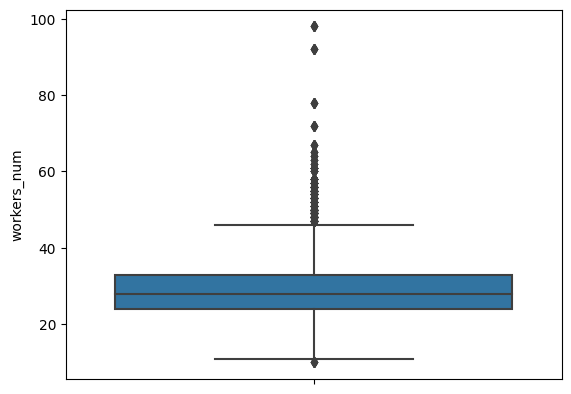

In [7]:
sns.boxplot(y='workers_num', data=df)

#### While handling missing values of the variable, there are some outliers in them, we need to use median approuch to fill them.<br>And for the categorical variables we are using mode approuch.  

In [8]:
# For numeric variables using median approuch
df['workers_num'].fillna(int(df['workers_num'].median()), inplace=True)

In [9]:
# For categorical variables using mode approuch
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [10]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna('C')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

#### wh_est_year: Warehouse established year is missing 47 % data therefore not contributing much in model building.<br>Better to drop this variable.

In [12]:
# Cheching all the categories of the categorical varibles
print(df['Location_type'].astype('category').value_counts(),
      df['WH_capacity_size'].astype('category').value_counts(),
      df['zone'].astype('category').value_counts(),
      df['WH_regional_zone'].astype('category').value_counts(),
      df['wh_owner_type'].astype('category').value_counts(),
      df['approved_wh_govt_certificate'].astype('category').value_counts())

Rural    22957
Urban     2043
Name: Location_type, dtype: int64 Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64 North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64 Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64 Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64 C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64


#### Creating two subsets of the original dataset in order to explore the data properly. And not taking risk of losing the original data.<br>warehouse_numeric for numeric data & warehouse_object for categogical data.

In [13]:
# Creating a subset containing all numeric featuers. 
warehouse_numeric = df.select_dtypes(include=['int', 'float'])

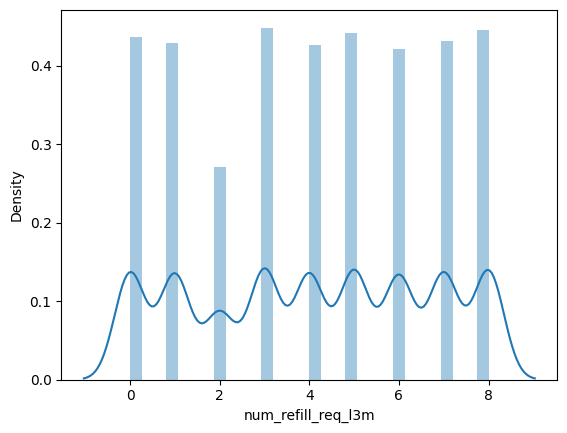

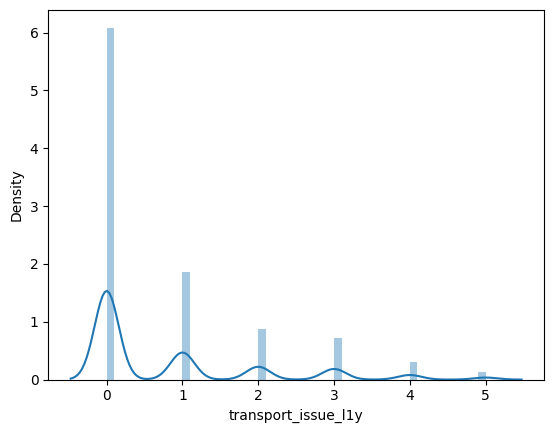

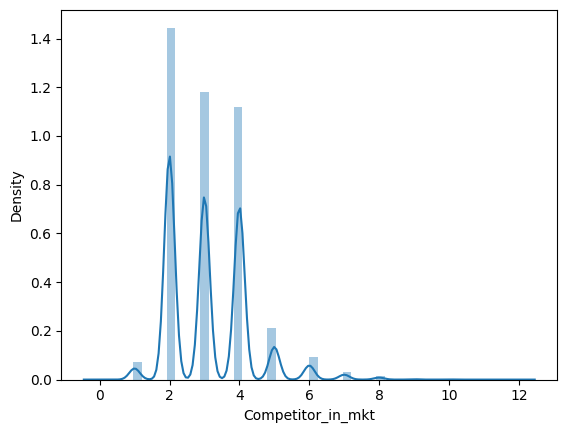

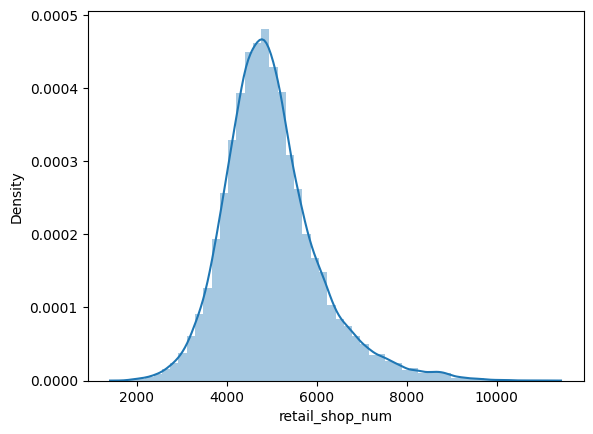

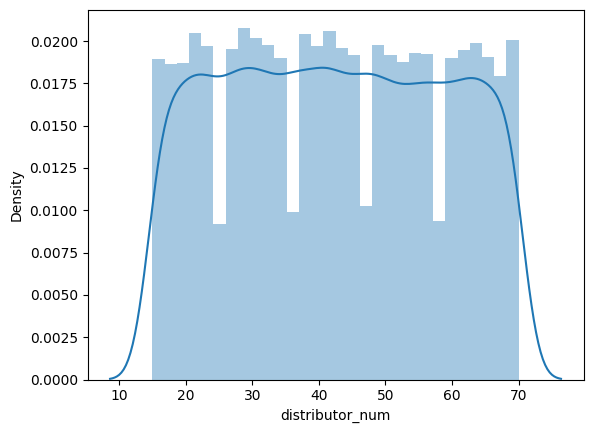

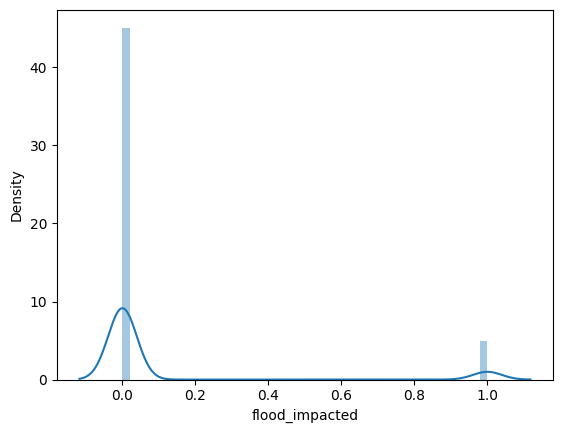

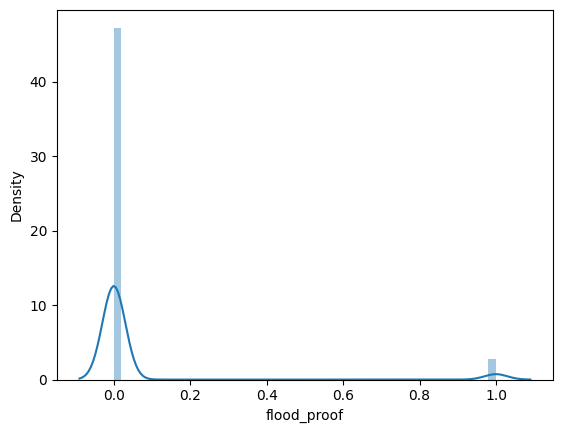

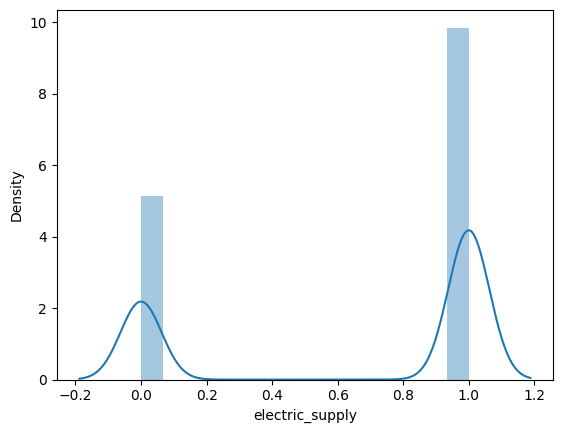

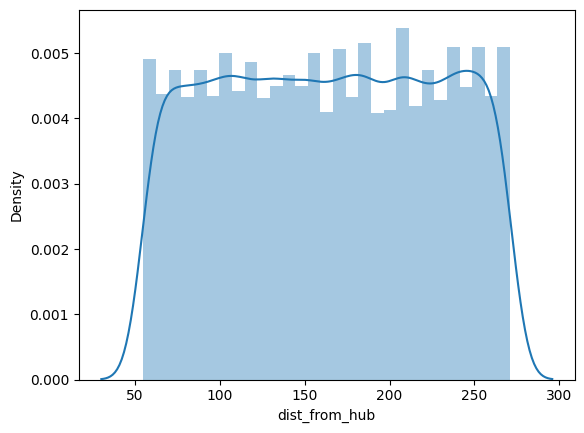

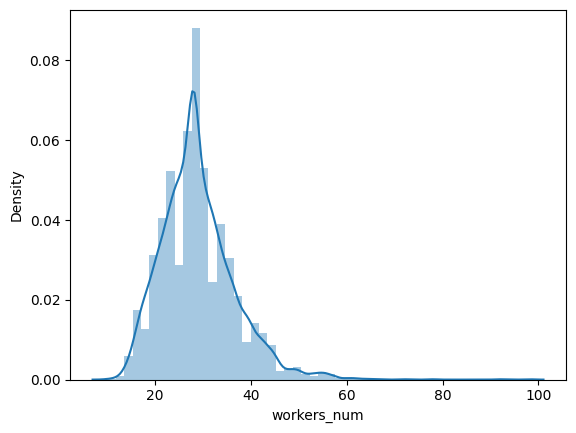

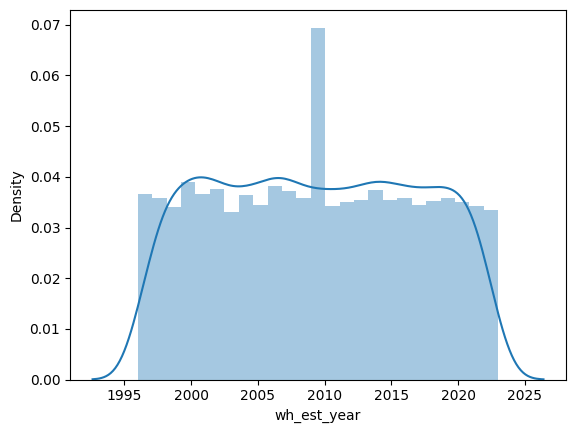

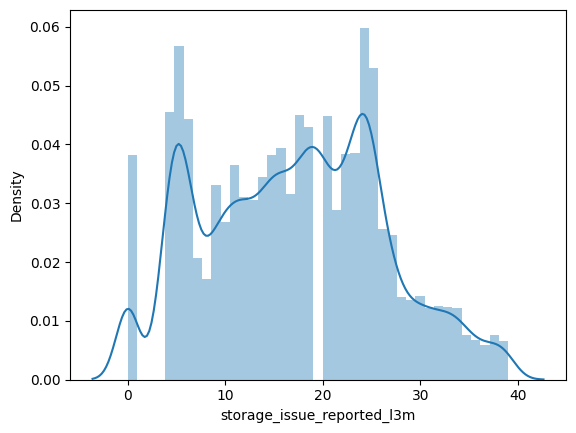

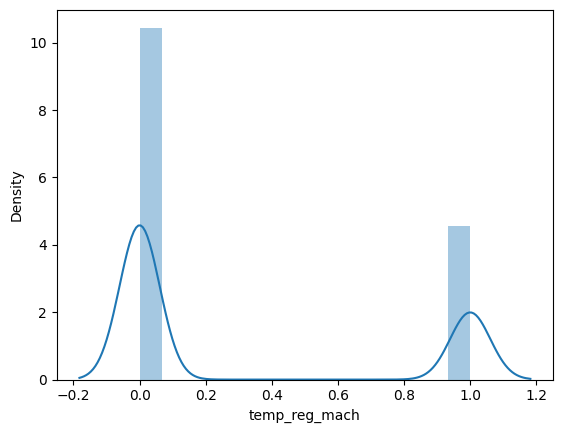

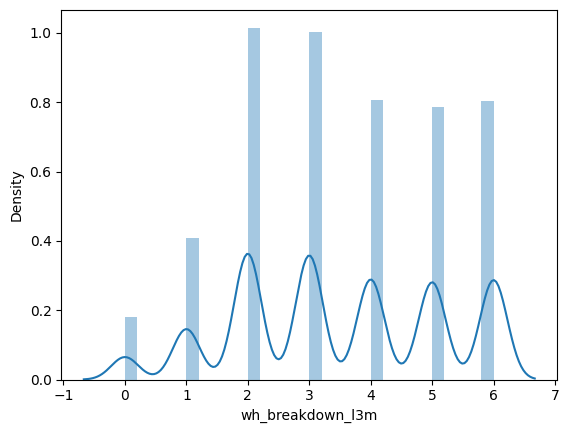

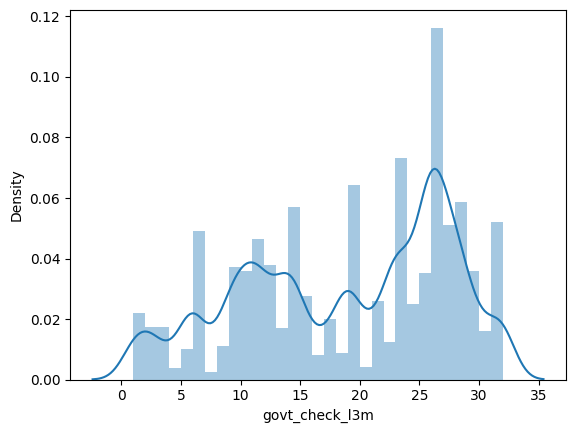

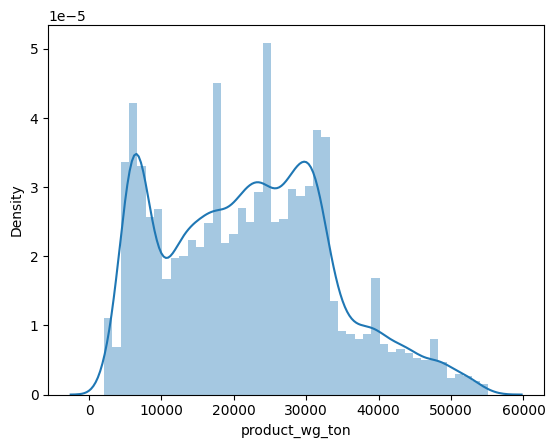

In [14]:
# Definnig a function to get distibution plot of all the coulmns in warehouse_numeric
def distplot(col):
    sns.distplot(warehouse_numeric[col])
    plt.show()
    
for i in list(warehouse_numeric.columns):
    distplot(i)

<AxesSubplot: xlabel='storage_issue_reported_l3m', ylabel='Density'>

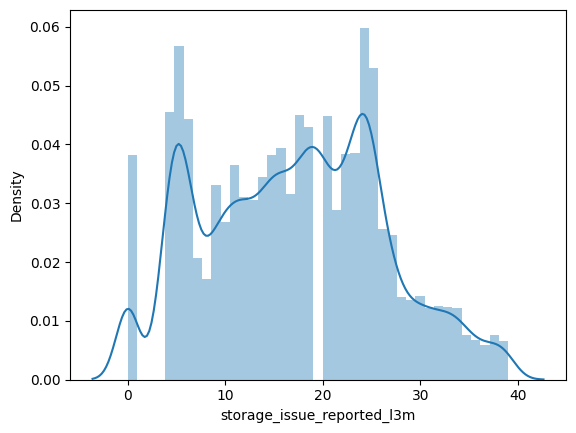

In [15]:
sns.distplot(warehouse_numeric['storage_issue_reported_l3m'])

<AxesSubplot: xlabel='product_wg_ton', ylabel='Density'>

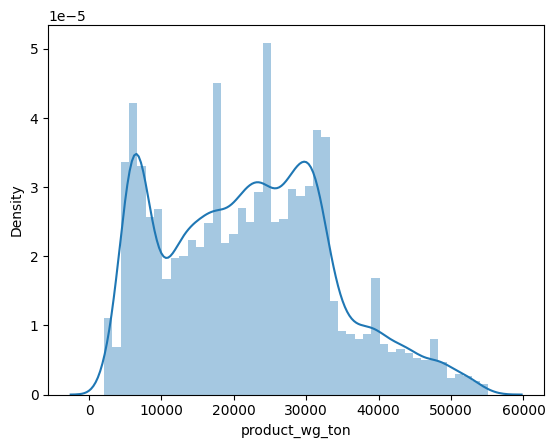

In [16]:
sns.distplot(warehouse_numeric['product_wg_ton'])

#### Distribution plot of Target variable 'product_wg_ton' and 'storage_issue_reported_l3m' are almost identical

In [17]:
df.head(10)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,5053,Rented,37,0,0,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,4449,Company Owned,38,0,0,1,77,27.0,2010.0,24,0,B,3,6,30142
7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,7183,Rented,45,0,0,0,241,23.0,NaN,18,0,C,6,24,24093
8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,5381,Rented,42,0,0,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,3869,Company Owned,35,0,0,0,78,43.0,NaN,6,0,C,6,2,7130


<AxesSubplot: >

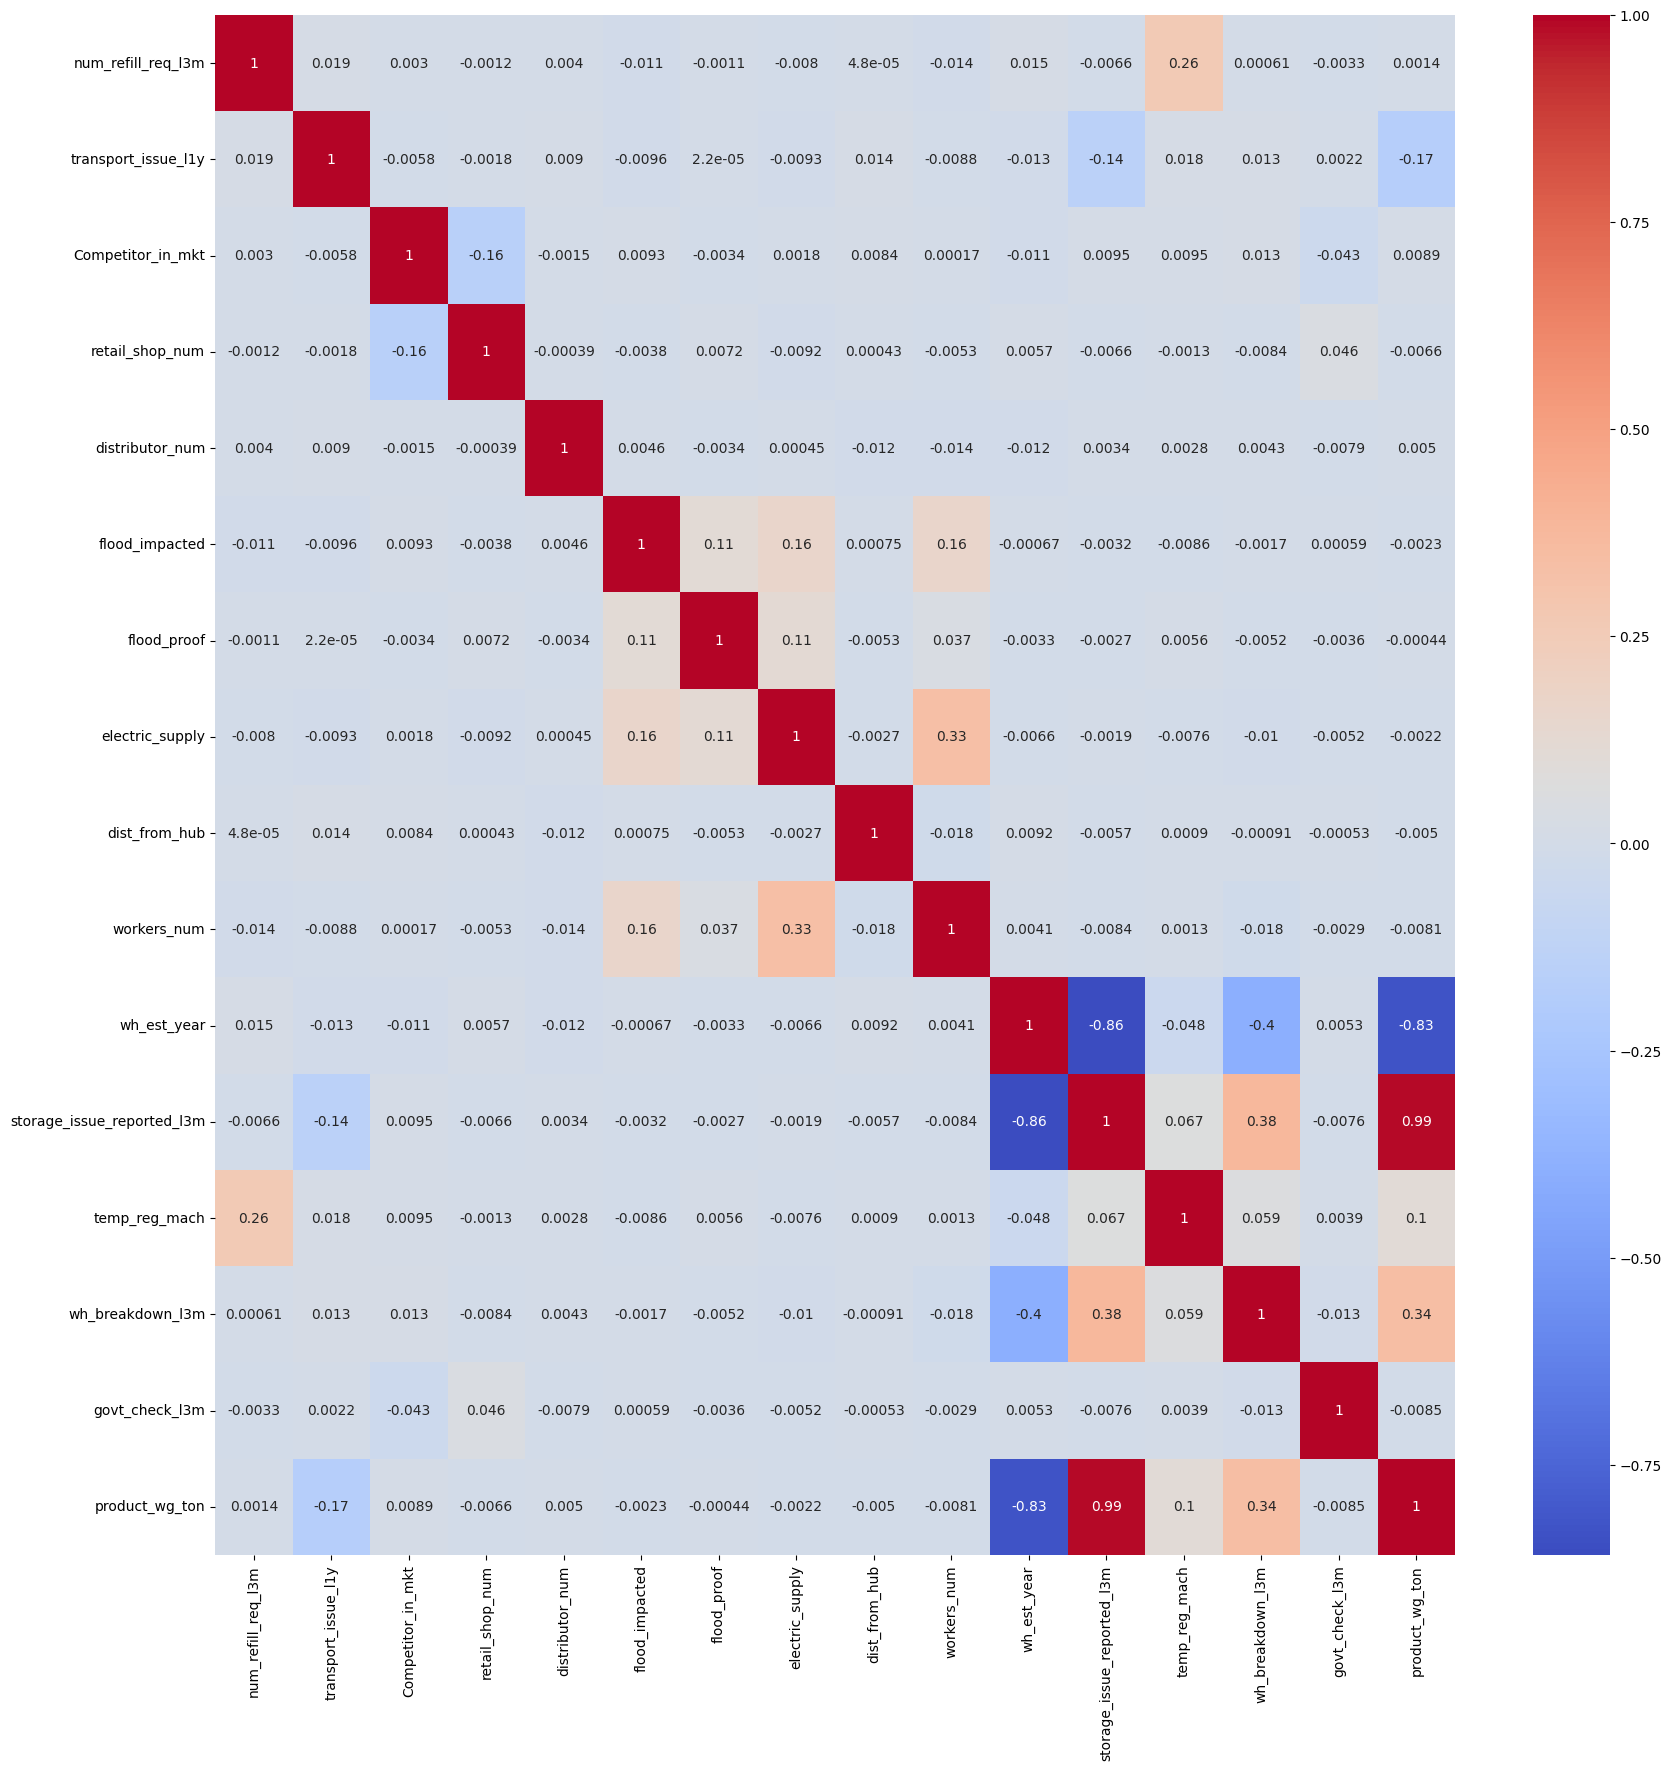

In [18]:
# Finding the correlation in the dataset.
# Defining figure size
plt.figure(figsize=(20,20))

# Correlation by heatmap
corr = warehouse_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### 'storage_issue_reported_l3m': Strorage Issue Reported feature is highly correlated with the target variable.
#### By the problem statement and this analysis (heatmap) we can say that feature 'storage_issue_reported_l3m' and target variable 'product_wg_ton' are inversly proportional to each other.<br> Lets check categorical variables.

### 2.Data Cleaning

#### The second step in model building is data cleaning<br> - We need to drop variable 'wh_est_year' because of missing 47% of the data.

In [19]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [20]:
# Dropping varibles from warehouse_numric
# we don't need 'Ware_house_ID' & 'WH_Manager_ID' for model building, so dropping them.
df = df.drop(['Ware_house_ID', 'WH_Manager_ID', 'wh_est_year'], axis=1)

In [21]:
# Creating new subset of the dataset which will contain only categorical features. 
warehouse_object = df.select_dtypes(include=['object'])

In [22]:
# Checking the size of both the subsets.
print(df.shape)
print(warehouse_object.shape)

(25000, 21)
(25000, 6)


In [23]:
df.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [24]:
warehouse_object.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,Urban,Small,West,Zone 6,Rented,A
1,Rural,Large,North,Zone 5,Company Owned,A
2,Rural,Mid,South,Zone 2,Company Owned,A
3,Rural,Mid,North,Zone 3,Rented,A+
4,Rural,Large,North,Zone 5,Company Owned,C


### 3.Data Preparation

#### We have created a subset of data, warehouse object ,<br> In warehouse object there are categorical variables for which we cannot directly convert to numerial types, So we can make use of get_dummies of pandas to suitable dummies for different levels of variables.<br> Lets now create dummy variables for categorical variables.

In [25]:
# 'warehouse_object': subset in which all the categorical variables are stored.
warehouse_object.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,Urban,Small,West,Zone 6,Rented,A
1,Rural,Large,North,Zone 5,Company Owned,A
2,Rural,Mid,South,Zone 2,Company Owned,A
3,Rural,Mid,North,Zone 3,Rented,A+
4,Rural,Large,North,Zone 5,Company Owned,C


In [26]:
# Convert them into dummies & droping the first dummy to get k-1 dummies, where k is total dummies.
warehouse_dummies = pd.get_dummies(warehouse_object, drop_first=True) 
warehouse_dummies.head()

,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [27]:
# Dropping the categorical variables from the original dataframe 
df = df.drop(list(warehouse_object.columns), axis=1)

In [28]:
# Concatinating dummy variables subset & original dataset to make make the requierd DataFrame for model building.
df = pd.concat([df, warehouse_dummies], axis=1)

In [29]:
df.head(10)

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
5,8,0,2,5053,37,0,0,1,152,35.0,23,1,3,3,32134,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
6,8,0,4,4449,38,0,0,1,77,27.0,24,0,3,6,30142,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
7,1,0,4,7183,45,0,0,0,241,23.0,18,0,6,24,24093,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
8,8,1,4,5381,42,0,0,1,124,22.0,13,1,5,2,18082,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0
9,4,3,3,3869,35,0,0,0,78,43.0,6,0,6,2,7130,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1


### 4. Model Building & Evaluating

#### The 4th and important step in machine learning is Model Building & Evaluating it.
#### The first step im model building is usual train test split.

In [30]:
# Spliting the dataframe into train & test sets.
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=102)

### Scaling

#### Now we have done the train-test split, we need to scale the variable for better interpretability and for handling the outliers. But we  only need to scale the numeric columns & not the dummy variables. Lets take a look at the list of numeric variableswe had created in the beginning. <br> Also the scaling has to be done only on the train dataset as you dont want the model to learn anything from the test data. 

In [31]:
# This is the numeric subset of the data.
warehouse_numeric.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

#### Now scaling all these columns using Standard Scaler.

#### 'flood_impacted', 'flood_proof','electric_supply','temp_reg_mach' : These are binary categorical variables.<br> 'wh_est_year', : We have already elliminated these variables.

In [32]:
# Importing the StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_list = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m',
        'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton']

df_train[scale_list] = scaler.fit_transform(df_train[scale_list])

In [33]:
from sklearn.preprocessing import FunctionTransformer
inverse_transform = FunctionTransformer(func=np.reciprocal, validate=True)
df_train['storage_issue_reported_l3m'] = inverse_transform.fit_transform(df_train['storage_issue_reported_l3m'].values.reshape(-1,1))

In [34]:
df_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
22721,-1.186325,-0.644472,-0.096440,0.245635,-0.581682,0,0,1,-1.273762,-1.024605,-0.756639,0,0.904753,0.945958,-1.378974,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4463,-1.570026,1.855096,-0.970387,-1.267602,1.472193,0,0,0,1.426246,0.652326,-1.498951,0,-1.464950,-1.837313,-0.691012,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9686,-0.802625,-0.644472,0.777507,0.625615,1.347715,0,0,0,1.250505,-1.669579,1.331641,0,0.312327,0.018201,0.686632,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0
12558,0.732177,-0.644472,0.777507,0.044188,1.472193,0,0,1,-0.954235,0.136347,4.865345,0,1.497178,-0.793586,0.434351,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6448,1.115878,-0.644472,1.651453,-0.952543,-1.577501,0,0,0,-0.427014,-0.121642,-8.215884,1,-0.280099,-0.793586,0.088304,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0


#### Now the variables are appropriately scaled. We need to divide the data into dependent & independent variables.

In [35]:
# spliting the train dataset into x_train & y_train
y_train = df_train.pop('product_wg_ton')
x_train = df_train

####   

### Building first model with all features.

In [36]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
#The Coefficients & intercepts
print(lr.coef_)
print(lr.intercept_)

[-0.00099031 -0.17704227 -0.0052725  -0.00517485  0.00561754 -0.01392263
  0.02253189  0.00435834 -0.00360385  0.00039259  0.00568751  0.0481797
  0.31173703 -0.00668501  0.18667467  0.01354786 -0.01228195 -0.04034242
 -0.06558645 -0.06646704  0.0227106  -0.02208756  0.01292481  0.00323795
  0.02020378  0.00630028  0.16458003 -0.23299403 -0.20901964 -0.3241657 ]
0.15880037346808273


#### - At this point we have 30 variables in x_train dataset, <br> But for building a better model we should have less features that give  more accurate predictions.<br> So now are we are using RFE mothod, Recursive Feature Ellimination. 


In [38]:
#Import RFE 
from sklearn.feature_selection import RFE

# RFE with 15 features
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select = 15, step=1)
rfe.fit(x_train, y_train)

print(rfe.support_)
print(rfe.ranking_)
print(x_train.columns[rfe.support_])

[False  True False False False False  True False False False False  True
  True False  True False False  True  True  True  True False  True False
  True False  True  True  True  True]
[15  1 10 11  7  4  1 12 13 16  8  1  1  6  1  5  3  1  1  1  1  2  1 14
  1  9  1  1  1  1]
Index(['transport_issue_l1y', 'flood_proof', 'temp_reg_mach',
       'wh_breakdown_l3m', 'Location_type_Urban', 'zone_North', 'zone_South',
       'zone_West', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 6', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'],
      dtype='object')


In [39]:
# Building the model with features given by RFE

In [40]:
# Importing statsmodels
import statsmodels.api as sm

#subset only the featurers selected by RFE
col = x_train.columns[rfe.support_]
x_train_rfe = x_train[col]

# Adding constants to the model because statsmodel fits the line by default through the origin.
x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe.head()

,const,transport_issue_l1y,flood_proof,temp_reg_mach,wh_breakdown_l3m,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 4,WH_regional_zone_Zone 6,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
22721,1.0,-0.644472,0,0,0.904753,0,1,0,0,0,0,0,0,0,1,0
4463,1.0,1.855096,0,0,-1.464950,0,0,1,0,0,0,0,0,0,0,0
9686,1.0,-0.644472,0,0,0.312327,0,0,0,1,0,0,0,0,0,0,0
12558,1.0,-0.644472,0,0,1.497178,0,0,0,1,1,0,0,0,0,0,0
6448,1.0,-0.644472,0,1,-0.280099,1,0,0,1,1,0,0,1,0,0,0


In [41]:
# Fitting the model with 15 variable
lr1 = sm.OLS(y_train, x_train_rfe).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     297.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:21   Log-Likelihood:                -26366.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19984   BIC:                         5.289e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [42]:
# Creating a DataFrame that contains all the features and their VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = x_train_rfe.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif

,features,Variance Inflation Factor
0,const,62.809163
1,transport_issue_l1y,1.001361
2,flood_proof,1.000448
3,temp_reg_mach,1.259595
4,wh_breakdown_l3m,1.045145
5,Location_type_Urban,1.003297
6,zone_North,14.531550
7,zone_South,11.618653
8,zone_West,13.051883
9,WH_regional_zone_Zone 2,1.182434


#### Lets Check For even less features. 

#### Becuase we have taken receiprocal of our most significant variable 'storage_issue_reported_l3m' , R squred has become very less. But we intend to solve supply and demand issue this model good. <br> lets see how our model performance with even less features.

In [43]:
# RFE with 10 features
lr = LinearRegression()
rfe1 = RFE(lr, n_features_to_select = 10, step=1)
rfe1.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [44]:
#subset only the featurers selected by RFE1
col1 = x_train.columns[rfe1.support_]
x_train_rfe1 = x_train[col1]

# Adding constants to the model because statsmodel fits the line by default through the origin.
x_train_rfe1 = sm.add_constant(x_train_rfe1)

# Fitting the model 
lr2 = sm.OLS(y_train, x_train_rfe1).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     444.9
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:22   Log-Likelihood:                -26369.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19989   BIC:                         5.285e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
vif = pd.DataFrame()
vif['features'] = x_train_rfe1.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif

,features,Variance Inflation Factor
0,const,6.086016
1,transport_issue_l1y,1.001131
2,temp_reg_mach,1.258804
3,wh_breakdown_l3m,1.045000
4,Location_type_Urban,1.003217
5,zone_South,1.039889
6,WH_regional_zone_Zone 2,1.039550
7,approved_wh_govt_certificate_A+,1.843275
8,approved_wh_govt_certificate_B,1.638500
9,approved_wh_govt_certificate_B+,1.649184


In [46]:
# Lets drop variables that has p values more than 0.05
x_train_rfe1.drop(['zone_South'],axis=1, inplace=True)

In [47]:
# Adding constants to the model because statsmodel fits the line by default through the origin.
x_train_rfe1 = sm.add_constant(x_train_rfe1)

# Fitting the model 
lr2 = sm.OLS(y_train, x_train_rfe1).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     494.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:22   Log-Likelihood:                -26370.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19990   BIC:                         5.284e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [48]:
x_train_rfe1.drop(['WH_regional_zone_Zone 2'],axis=1, inplace=True)

In [49]:
# Adding constants to the model because statsmodel fits the line by default through the origin.
x_train_rfe1 = sm.add_constant(x_train_rfe1)

# Fitting the model 
lr2 = sm.OLS(y_train, x_train_rfe1).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     555.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:22   Log-Likelihood:                -26371.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19991   BIC:                         5.283e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [50]:
vif = pd.DataFrame()
vif['features'] = x_train_rfe1.columns
vif['Variance Inflation Factor'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif

,features,Variance Inflation Factor
0,const,5.689134
1,transport_issue_l1y,1.000993
2,temp_reg_mach,1.258716
3,wh_breakdown_l3m,1.044938
4,Location_type_Urban,1.002893
5,approved_wh_govt_certificate_A+,1.843036
6,approved_wh_govt_certificate_B,1.638188
7,approved_wh_govt_certificate_B+,1.649121
8,approved_wh_govt_certificate_C,1.803532


#### After removing variables R squared has remained same.<br> All the VIF (<5) and P values (0.05) seems to be in good range.

### Residual Analysis 
#### Before we make the predictions on the test data we need check the actual accuracy,..Residual Analusis

In [51]:
y_train_wg = lr2.predict(x_train_rfe1)

Text(0.5, 0, 'Error')

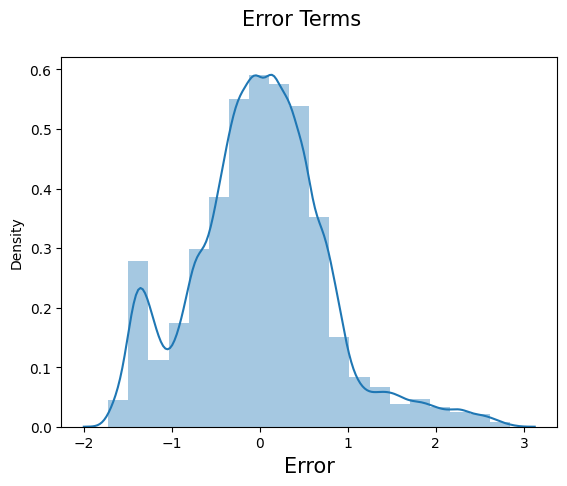

In [52]:
# plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train, y_train_wg), bins=20)
fig.suptitle('Error Terms', fontsize=15) 
plt.xlabel('Error', fontsize=15)


In [53]:
#Making train Predictions
y_pred_train = lr2.predict(x_train_rfe1)
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     555.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:23   Log-Likelihood:                -26371.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19991   BIC:                         5.283e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print('Root Mean Squared: ',rmse)

Root Mean Squared:  0.9044674201891337


### Making Predictions

#### We would first need to scale the test set as well using only transform but not using fit_transform, so that the model will not learmn about the data

In [55]:
df_test[scale_list] = scaler.transform(df_test[scale_list])

In [56]:
# transforming the 'storage_issue_reported_l3m' feature to its reciprocal
df_test['storage_issue_reported_l3m'] = inverse_transform.transform(df_test['storage_issue_reported_l3m'].values.reshape(-1,1))

In [57]:
# splitting the test set into x_test and y_test
y_test = df_test.pop('product_wg_ton')
x_test = df_test

In [58]:
# Cheking the col1 which has variables that are selected by RFE
col1

Index(['transport_issue_l1y', 'temp_reg_mach', 'wh_breakdown_l3m',
       'Location_type_Urban', 'zone_South', 'WH_regional_zone_Zone 2',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [59]:
# Creartig a new DataFrame
x_test_rfe1 = x_test[col1]

In [60]:
x_test_rfe1.drop(['zone_South','WH_regional_zone_Zone 2'],axis=1, inplace=True)

In [61]:
# Adding constants to test set
x_test_rfe1 = sm.add_constant(x_test_rfe1)
x_test_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 5189 to 4411
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            5000 non-null   float64
 1   transport_issue_l1y              5000 non-null   float64
 2   temp_reg_mach                    5000 non-null   int64  
 3   wh_breakdown_l3m                 5000 non-null   float64
 4   Location_type_Urban              5000 non-null   uint8  
 5   approved_wh_govt_certificate_A+  5000 non-null   uint8  
 6   approved_wh_govt_certificate_B   5000 non-null   uint8  
 7   approved_wh_govt_certificate_B+  5000 non-null   uint8  
 8   approved_wh_govt_certificate_C   5000 non-null   uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 219.7 KB


In [62]:
# Making Predictions
y_pred_test = lr2.predict(x_test_rfe1)
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     555.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:54:23   Log-Likelihood:                -26371.
No. Observations:               20000   AIC:                         5.276e+04
Df Residuals:                   19991   BIC:                         5.283e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [63]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('Root Mean Squared: ',rmse)

Root Mean Squared:  0.8911022266140061


#### Thus, for the model with only 8 variables the r squared & Adjusted r squared on training & test datais about 0.182
#### But the higher management has noticed that the supply and demand has mismatched.<br>'storage_issue_reported_l3m' : storage issue reported in last 3 months, this feature highly significant. And we have taken inverse of the feature,<br>Therefore the model now might look as having bad accuracy.<br>The model will overcome the supply and demand mismatch, for now.
#### We have seen that there are very weak correlation to the target variable 'product_wg_tons. <br>Retraining the model for future data is necessary. By having 360 degrees of data a model can give more accurate predictons in future. 